In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [7]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=178, freq=None)

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b.T.index

Index(['ObjectId', 'ReportedOn', 'ReportedCum', 'Deceased', 'Recovered',
       'Hospitalized', 'ICU', 'Vent', 'StillIll', 'PosPatients', 'PUIPatients',
       'DeathsCum', 'COVIDnICU', 'COVIDonVent', 'TotalVents', 'AvailVent',
       'TotalStaffedBeds', 'AvailStaffedBeds', 'BCLabTests', 'BCTestNegative',
       'BCTestPositive', 'BCTestInc', 'DBCLabTests', 'DBCTestNegative',
       'DBCTestPositive', 'DBCTestInc', 'WeekQuar', 'EverQuar'],
      dtype='object')

In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['Deceased'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
c_7day_moving= c.rolling(7).mean().shift()

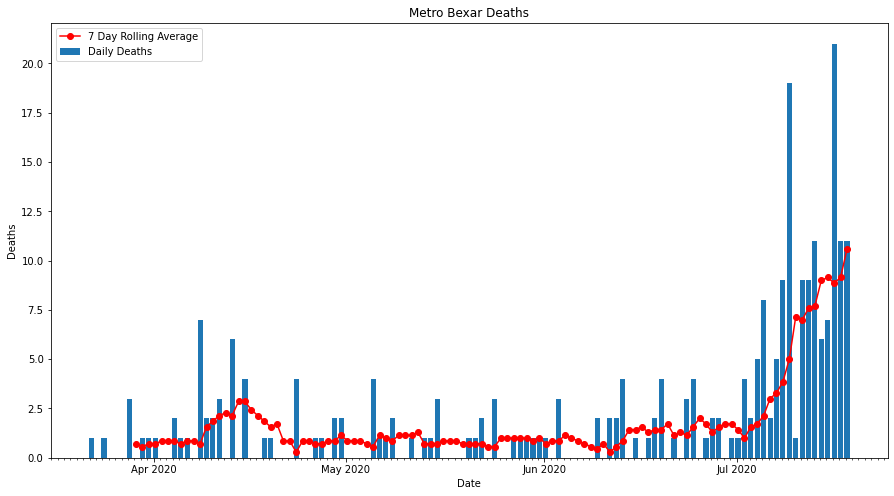

In [14]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Deaths',color='black')
plt.title('Metro Bexar Deaths')
plt.bar(c.index,c)
plt.plot(c_7day_moving, 'ro-')
plt.legend(['7 Day Rolling Average','Daily Deaths'])
fig.savefig('MetroDeaths.png')

In [15]:
x = b['DeathsCum']

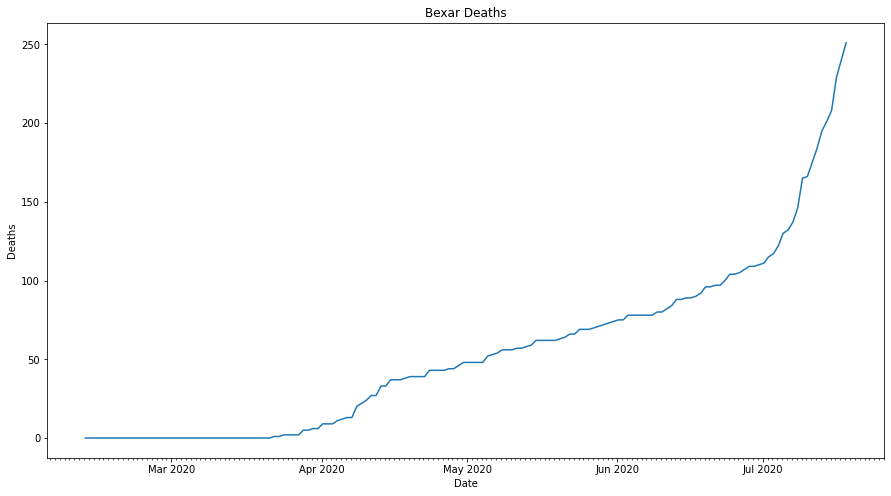

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Deaths',color='black')
plt.title('Bexar Deaths')
plt.plot(x)
fig.savefig('BexarDeaths.png')

In [17]:
c

Date
2020-03-22 06:00:00     1.0
2020-03-23 06:00:00     0.0
2020-03-24 06:00:00     1.0
2020-03-25 06:00:00     0.0
2020-03-26 06:00:00     0.0
                       ... 
2020-07-14 05:00:00     6.0
2020-07-15 05:00:00     7.0
2020-07-16 05:00:00    21.0
2020-07-17 05:00:00    11.0
2020-07-18 05:00:00    11.0
Name: Deceased, Length: 119, dtype: float64

In [18]:
c[c > 15]

Date
2020-07-09 05:00:00    19.0
2020-07-16 05:00:00    21.0
Name: Deceased, dtype: float64